In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm , skew
import matplotlib
%matplotlib.inine
from matplotlib import pyplot
import warnings
warning.filterwarnings('ignore')

UsageError: Line magic function `%matplotlib.inine` not found.


In [3]:
df=pd.read_csv('train.csv')

In [4]:
test=pd.read_csv('test.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
len_train=len(df)
len_test=len(test)

In [8]:
print(len_test)
print(len_train)

367
614


In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
test['Loan_Status']=0

In [20]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,0
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,0
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0


In [53]:
dff=df.append(test)

In [54]:
dff.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
dff.drop(['Loan_ID'],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,0
363,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,0
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,0
365,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,0


In [56]:
dff['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [57]:
dff['Credit_History']=dff['Credit_History'].fillna(float(0.0))

In [58]:
dff['Credit_History'].value_counts()

1.0    754
0.0    227
Name: Credit_History, dtype: int64

In [59]:
dff['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [60]:
dff['Married']=dff['Married'].fillna("No")

In [65]:
dff['Dependents']=dff['Dependents'].fillna(int(0))

In [66]:
dff['Dependents'].value_counts()

0     545
2     160
1     160
3+     91
0      25
Name: Dependents, dtype: int64

In [68]:
dff['Self_Employed']=dff['Self_Employed'].fillna('No')

In [69]:
dff['Self_Employed'].value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [74]:
dff.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
dff['Gender']=dff['Gender'].fillna('More')

In [73]:
dff['Loan_Amount_Term']=dff['Loan_Amount_Term'].fillna(dff['Loan_Amount_Term'].mean())

In [76]:
dff=dff.dropna(subset=['LoanAmount'])

In [77]:
dff['Total_Income'] = dff['ApplicantIncome'] + dff['CoapplicantIncome']
dff.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [79]:
num_cols=[]
for i in dff.columns:
    if dff[i].dtypes == int or dff[i].dtypes == float:
        num_cols.append(i)

In [80]:
num_cols

['CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Total_Income']

In [89]:
skewness

array([ 6.81408856,  2.70976658, -2.51542521, -1.27210171,  6.05602356])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

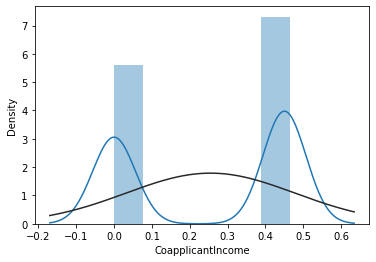

In [101]:
dff['CoapplicantIncome'] = np.log1p(dff['CoapplicantIncome'])
sns.distplot(dff["CoapplicantIncome"],fit=norm)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

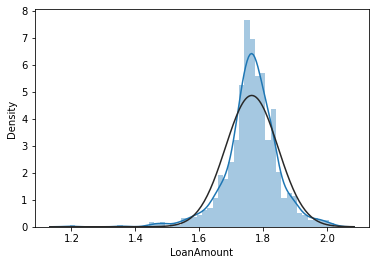

In [100]:
# dff['CoapplicantIncome'] = np.log1p(dff['CoapplicantIncome'])
sns.distplot(dff["LoanAmount"],fit=norm)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

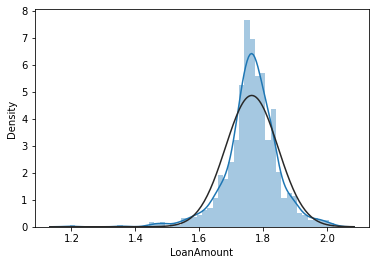

In [99]:
dff['LoanAmount'] = np.log1p(dff['LoanAmount'])
sns.distplot(dff["LoanAmount"],fit=norm)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

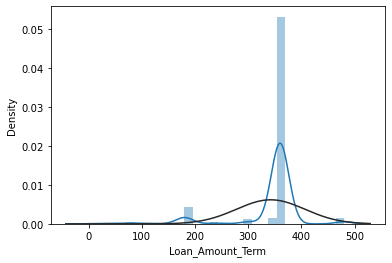

In [102]:
sns.distplot(dff["Loan_Amount_Term"],fit=norm)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

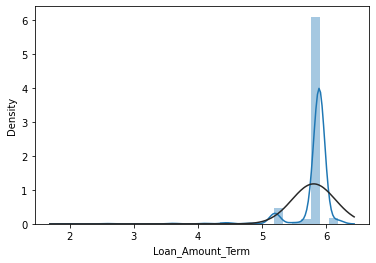

In [103]:
dff['Loan_Amount_Term'] = np.log1p(dff['Loan_Amount_Term'])
sns.distplot(dff["Loan_Amount_Term"],fit=norm)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

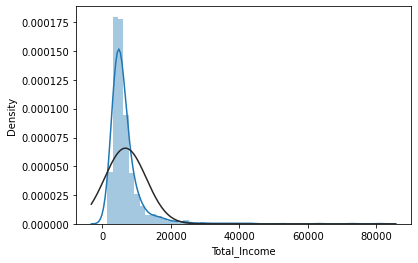

In [104]:
sns.distplot(dff["Total_Income"],fit=norm)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

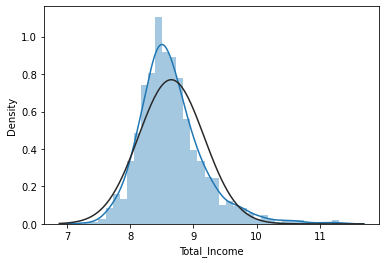

In [105]:
dff['Total_Income'] = np.log1p(dff['Total_Income'])
sns.distplot(dff["Total_Income"],fit=norm)

<Figure size 1080x1440 with 0 Axes>

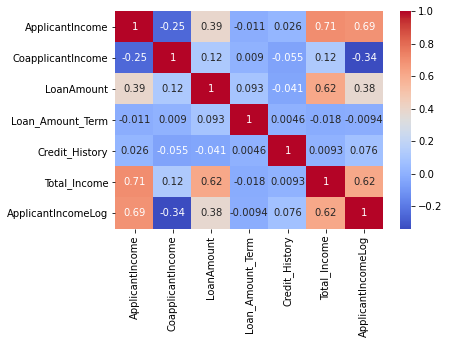

<Figure size 1080x1440 with 0 Axes>

In [111]:
import matplotlib.pyplot as plt
corr=dff.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.figure(figsize=(15,20))

In [112]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 1 to 366
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             954 non-null    object 
 1   Gender              954 non-null    object 
 2   Married             954 non-null    object 
 3   Dependents          954 non-null    object 
 4   Education           954 non-null    object 
 5   Self_Employed       954 non-null    object 
 6   ApplicantIncome     954 non-null    int64  
 7   CoapplicantIncome   954 non-null    float64
 8   LoanAmount          954 non-null    float64
 9   Loan_Amount_Term    954 non-null    float64
 10  Credit_History      954 non-null    float64
 11  Property_Area       954 non-null    object 
 12  Loan_Status         954 non-null    object 
 13  Total_Income        954 non-null    float64
 14  ApplicantIncomeLog  954 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 119.2+ K

In [145]:
obj_fetures=[]
for i in dff.columns:
    if dff[i].dtypes== 'object':
        obj_fetures.append(i)

In [146]:
obj_fetures

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [147]:
for i in obj_fetures:
    print(i)
    print(dff[i].value_counts())
    print()

Gender
Male      752
Female    178
More       24
Name: Gender, dtype: int64

Married
Yes    612
No     342
Name: Married, dtype: int64

Dependents
0     554
2     157
1     154
3+     89
Name: Dependents, dtype: int64

Education
Graduate        744
Not Graduate    210
Name: Education, dtype: int64

Self_Employed
No     838
Yes    116
Name: Self_Employed, dtype: int64

Property_Area
Semiurban    342
Urban        329
Rural        283
Name: Property_Area, dtype: int64

Loan_Status
N    543
Y    411
Name: Loan_Status, dtype: int64



In [149]:
# dff.drop(['Loan_ID'],axis=1,inplace=True)

In [133]:
dff['Loan_Status']=dff['Loan_Status'].replace({0:'N'})

In [150]:
dff['Loan_Status'].value_counts()

N    543
Y    411
Name: Loan_Status, dtype: int64

In [136]:
dff['Dependents']=dff['Dependents'].replace({0:'0'})

In [151]:
dff['Dependents'].value_counts()

0     554
2     157
1     154
3+     89
Name: Dependents, dtype: int64

In [153]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in obj_fetures:
    dff[i]=le.fit_transform(dff[i])

In [154]:
dff.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog
1,1,1,1,0,0,4583,0.447933,1.768118,5.888878,1.0,0,0,8.714732,8.430327
2,1,1,0,0,1,3000,0.000000,1.649561,5.888878,1.0,2,1,8.006701,8.006701
3,1,1,0,1,0,2583,0.450738,1.757132,5.888878,1.0,2,1,8.505525,7.857094
4,1,0,0,0,0,6000,0.000000,1.784370,5.888878,1.0,2,1,8.699681,8.699681
5,1,1,2,0,1,5417,0.454036,1.885703,5.888878,1.0,2,1,9.170976,8.597482


<AxesSubplot:>

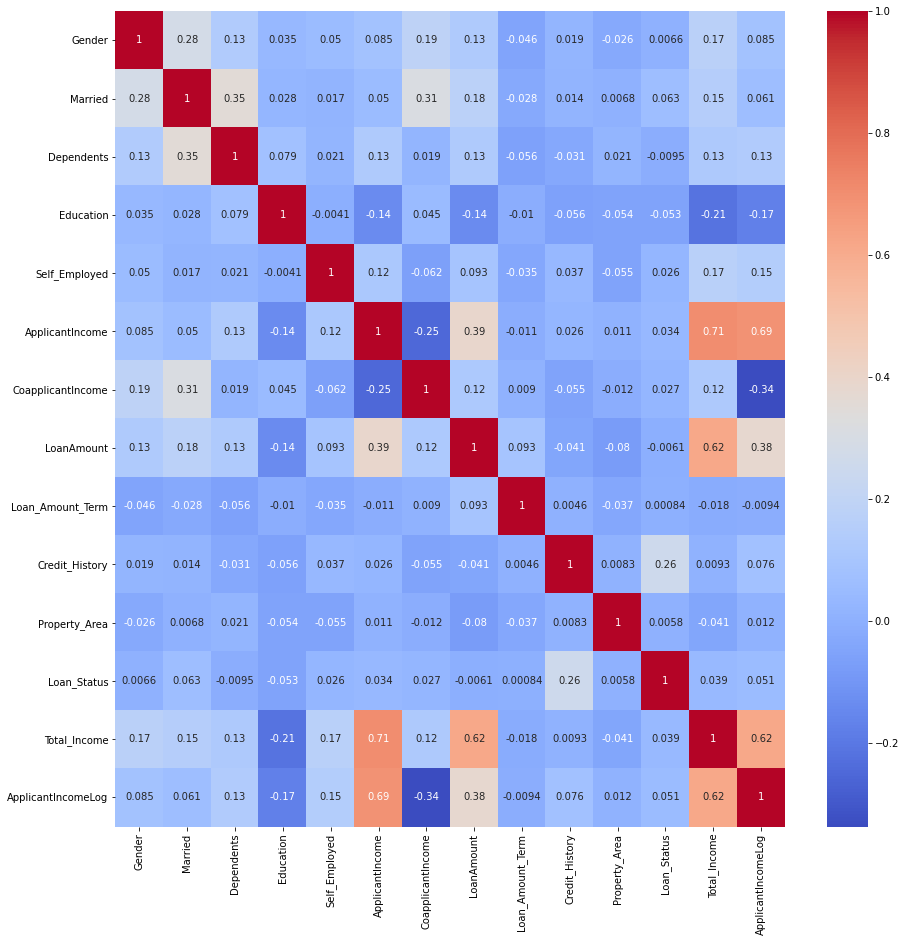

In [161]:
import matplotlib.pyplot as plt
corr=dff.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')


In [196]:
len(dff)
len_train
train=dff.iloc[:len_train,:]
test=dff.iloc[len_train:,:]
len(test)

340

In [198]:
test['Loan_Status'].value_counts()

0    340
Name: Loan_Status, dtype: int64

In [199]:
test.drop(['Loan_Status'],axis=1,inplace=True)

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [201]:
x=train.drop(['Loan_Status'],axis=1)
y=train['Loan_Status']

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [212]:
len(y_train)

491

In [214]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

68.29268292682927

In [216]:
from sklearn.tree import DecisionTreeClassifier
lr=DecisionTreeClassifier()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

57.72357723577236

In [225]:
from sklearn.ensemble import RandomForestClassifier
lr=RandomForestClassifier()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

70.73170731707317

In [228]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [229]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[22, 25],
       [13, 63]], dtype=int64)

<AxesSubplot:>

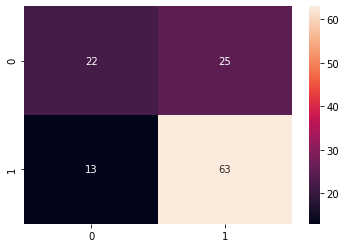

In [231]:
sns.heatmap(cm,annot=True)